In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,cross_val_score
import time
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

clfs = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=1), 
    'ADA': AdaBoostClassifier(n_estimators=100,random_state=1),
    'ET': ExtraTreesClassifier(n_estimators=100,random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'MLP': MLPClassifier(hidden_layer_sizes=(20,10),random_state=1),
    'XGB': xgb.XGBClassifier(n_estimators=100,random_state=1,objective='reg:logistic',
                             colsample_bytree=0.95,max_depth=4,verbosity=0)


}

def run_classifieurs(X,Y,clfs):
    kf = KFold(n_splits=10, shuffle=True, random_state=1) 
    for i in clfs:
        clf = clfs[i]
        debut=time.time()
        cv_acc = cross_val_score(clf, X, Y, cv=kf,scoring='accuracy')
        fin=time.time()
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f} en {3:.3f}s".format(i,
                                                                            np.mean(cv_acc),
                                                                            np.std(cv_acc),fin-debut))

## Dataset SMS

In [3]:
datasms=pd.read_csv('../../TP/TPAS/SMSSpamCollection.data',sep='\t',header=None)

In [4]:
datasms.head(3)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [5]:
Y=datasms.iloc[:,0].values
corpus=datasms.iloc[:,1].values
Y[Y=='spam']=1
Y[Y=='ham']=0
Y=Y.astype(int)

In [6]:
nbham=np.sum(Y==0)
nbspam=np.sum(Y==1)
print('Ham = {0:d} et Spam = {1:d}'.format(nbham,nbspam))

Ham = 4825 et Spam = 747


## CountVectorizer : création de la matrice de co-occurence

In [7]:
# from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [8]:
CV=CountVectorizer(max_features=300,stop_words='english')
CV.fit(corpus)
X=CV.transform(corpus)

In [9]:
corpus[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
X[0,:].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [11]:
CV.vocabulary_ # pour afficher le vocabulaire des mots (Bag of words) et les index
features=np.asarray(CV.get_feature_names()) # pour afficher que le vocabulaire des mots (Bag of words)
np.where(features=='great') # Recherche de l'index d'un mot

(array([102]),)

In [12]:
## Dans le cas de rajout de nouveaux stop_words et de re-run du Count Vectorizor
new_list=ENGLISH_STOP_WORDS.union(frozenset({'000','10','100','1000','150p','150ppm','16','18'}))
CV=CountVectorizer(max_features=300,stop_words=new_list)
CV.fit(corpus)
X=CV.transform(corpus)
features=np.asarray(CV.get_feature_names())
print(features)

['1st' '2nd' '50' '500' 'account' 'actually' 'afternoon' 'ah' 'aight'
 'amp' 'apply' 'ask' 'asked' 'award' 'awarded' 'babe' 'baby' 'bad' 'bed'
 'best' 'better' 'big' 'birthday' 'bit' 'box' 'boy' 'bt' 'bus' 'buy'
 'called' 'calls' 'came' 'camera' 'car' 'care' 'cash' 'chance' 'chat'
 'check' 'claim' 'class' 'code' 'collect' 'com' 'come' 'coming' 'contact'
 'cool' 'cos' 'cost' 'cs' 'customer' 'da' 'dad' 'dat' 'day' 'days' 'dear'
 'den' 'details' 'did' 'didn' 'didnt' 'dinner' 'dis' 'does' 'doing' 'don'
 'dont' 'draw' 'dun' 'dunno' 'early' 'easy' 'eat' 'end' 'enjoy' 'evening'
 'face' 'feel' 'fine' 'finish' 'forgot' 'free' 'friend' 'friends' 'fuck'
 'fun' 'getting' 'girl' 'god' 'going' 'gonna' 'good' 'got' 'great' 'gt'
 'guaranteed' 'gud' 'guess' 'guys' 'haha' 'half' 'happy' 'having' 'hear'
 'heart' 'hello' 'help' 'hey' 'hi' 'holiday' 'home' 'hope' 'hour' 'house'
 'ill' 'im' 'important' 'job' 'join' 'jus' 'just' 'kiss' 'know' 'landline'
 'lar' 'late' 'later' 'latest' 'leave' 'left' 'leh' 'le

In [13]:
run_classifieurs(X.toarray(),Y,clfs)

Accuracy for RF is: 0.975 +/- 0.003 en 14.335s
Accuracy for ADA is: 0.975 +/- 0.005 en 18.490s
Accuracy for ET is: 0.973 +/- 0.005 en 35.104s
Accuracy for KNN is: 0.946 +/- 0.007 en 0.848s
Accuracy for MLP is: 0.975 +/- 0.005 en 32.904s
Accuracy for XGB is: 0.976 +/- 0.003 en 15.241s


### TF-IDF : normalisation

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

In [15]:
TFIDF=TfidfTransformer()
TFIDF.fit(X)
X_TFIDF=TFIDF.transform(X)

#### Si vous souhaitez faire les deux étape en même temps
TFIDF=TfidfVectorizer(max_features=300,stop_words='english')
TFIDF.fit(corpus)
X_TFIDF=TDIDF.transform(corpus)

In [16]:
run_classifieurs(X_TFIDF.toarray(),Y,clfs)

Accuracy for RF is: 0.975 +/- 0.005 en 18.325s
Accuracy for ADA is: 0.976 +/- 0.004 en 14.045s
Accuracy for ET is: 0.977 +/- 0.003 en 26.991s
Accuracy for KNN is: 0.951 +/- 0.006 en 0.735s
Accuracy for MLP is: 0.977 +/- 0.007 en 39.466s
Accuracy for XGB is: 0.977 +/- 0.004 en 12.461s


## Sélection des mots clés les plus importants

['txt' 'free' 'claim' 'mobile' 'www' 'uk' 'prize' 'service' 'stop' 'text'
 'reply' 'win' '50' 'contact' 'cash' 'com' 'urgent' 'won' 'new' '500'
 'code' 'nokia' 'customer' 'chat' 'ringtone' 'cs' 'landline' 'sms' 'video'
 'cost' 'rate' 'tone' 'awarded' 'min' 'guaranteed' 'latest' 'shows' 'po'
 'message' 'box' 'camera' 'send' 'ur' 'mins' 'line' 'msg' 'draw' 'receive'
 'account' 'selected' 'help' 'apply' 'orange' 'just' 'award' 'collect'
 'holiday' 'hi' 'special' 'play' 'network' 'gt' 'lt' 'll' 'waiting'
 'phone' 'good' 'calls' 'know' 'like' 'week' 'tv' 'need' '1st' 'live'
 'time' 'number' 'make' 'xxx' 'xmas' 'got' 'chance' 'pls' 'offer' 'dont'
 'want' 'texts' 'day' 'sexy' 'real' 'hey' 'sent' 'did' 'love' 'buy'
 'looking' 'place' 'pick' 'days' 'let' 'little' 'think' 'luv' 'important'
 'wk' 'ok' 'don' 'end' 'hello' 'night' 'today' 'going' 'enjoy' 'wanna'
 'come' 've' 'talk' 'sorry' 'later' '2nd' 'thanks' 'tomorrow' 'year' 'sat'
 'great' 'babe' 'late' 'yes' 'ready' 'tell' 'mail' 'check' 'sir

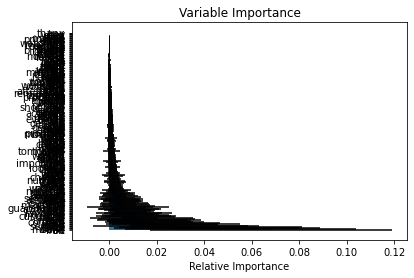

In [17]:
X_array=X_TFIDF.toarray()
clf = RandomForestClassifier(n_estimators=1000,random_state=1)
clf.fit(X_array, Y)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0) 
sorted_idx = np.argsort(importances)[::-1]
features =np.asarray(CV.get_feature_names())
print(features[sorted_idx])
padding = np.arange(X_array.size/len(X_array)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center') 
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance") 
plt.show()

### Recherche du nombre de mots clés pertinents à garder (critère d'arret)

In [18]:
# conda install -c conda-forge kneed

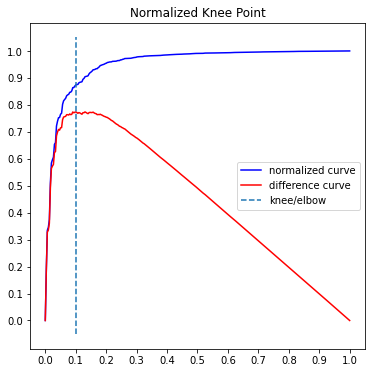

In [19]:
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
importances_S=MinMaxScaler().fit_transform(importances.reshape((-1,1))).flatten()
sorted_idx = np.argsort(importances_S)[::-1]
importances_trie = np.sort(importances_S)[::-1]
I = range(0, len(importances_S))
kneedle = KneeLocator(I, importances_trie, curve='convex', direction='decreasing')
nb_best=kneedle.elbow
kneedle.plot_knee_normalized()

### Affichage des mots clés pertinents

['txt' 'free' 'claim' 'mobile' 'www' 'uk' 'prize' 'service' 'stop' 'text'
 'reply' 'win' '50' 'contact' 'cash' 'com' 'urgent' 'won' 'new' '500'
 'code' 'nokia' 'customer' 'chat' 'ringtone' 'cs' 'landline' 'sms' 'video'
 'cost']


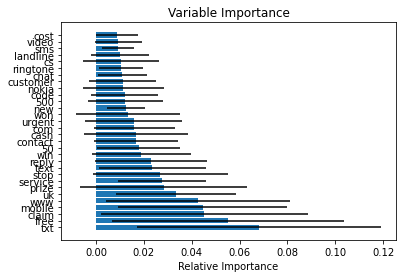

In [20]:
features =np.asarray(CV.get_feature_names())
print(features[sorted_idx][:nb_best])
padding = np.arange(nb_best) + 0.5
plt.barh(padding, importances[sorted_idx][:nb_best],xerr=std[sorted_idx][:nb_best], align='center') 
plt.yticks(padding, features[sorted_idx][:nb_best])
plt.xlabel("Relative Importance")
plt.title("Variable Importance") 
plt.show()

## SVD (Recherche de concepts)

On résoud à l'aide de cette méthode les problèmes de polysémie et synonymie en compressant nos dimenssions.

In [21]:
from sklearn.decomposition import TruncatedSVD

In [22]:
SVD=TruncatedSVD(n_components=20)
SVD.fit(X_TFIDF)
X_SVD=SVD.transform(X_TFIDF)

In [23]:
run_classifieurs(X_SVD, Y, clfs)

Accuracy for RF is: 0.973 +/- 0.005 en 8.156s
Accuracy for ADA is: 0.961 +/- 0.007 en 9.192s
Accuracy for ET is: 0.974 +/- 0.006 en 2.750s
Accuracy for KNN is: 0.966 +/- 0.005 en 0.613s
Accuracy for MLP is: 0.966 +/- 0.005 en 20.635s
Accuracy for XGB is: 0.974 +/- 0.006 en 2.997s


In [24]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Concept #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in np.abs(topic).argsort()[:-n_top_words - 1: -1]])
        print(message)

In [25]:
print_top_words(SVD, CV.get_feature_names(), 5)

Concept #0: ok gt lt just ll
Concept #1: ok gt lt lor ur
Concept #2: ok gt lt just ur
Concept #3: ll sorry later ur free
Concept #4: just ur like free know
Concept #5: come just free good going
Concept #6: come like know just good
Concept #7: like good know come day
Concept #8: know good want come got
Concept #9: got come going good da
Concept #10: ur free good know text
Concept #11: going got da home time
Concept #12: da time going send pls
Concept #13: time got going good want
Concept #14: lor want time going da
Concept #15: da time love good want
Concept #16: want lor send going pls
Concept #17: home pls did send good
Concept #18: home sorry going free don
Concept #19: need don prize claim won
